# Testing MLP and SVM With Windowed Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [56]:
simple_multi_dataset = pd.read_csv('simple_multi_dataset.csv')
vel_and_gyro = pd.read_csv('velocity_and_gyro_binned_3s.csv')

In [57]:
simple_multi_dataset.head(10)

,ride_id,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,simple_label
0,15692,2018-11-09 19:17:41.238,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,PADDLING
1,15692,2018-11-09 19:17:41.502,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,PADDLING
2,15692,2018-11-09 19:17:41.733,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,PADDLING
3,15692,2018-11-09 19:17:41.997,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,PADDLING
4,15692,2018-11-09 19:17:42.228,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,PADDLING
5,15692,2018-11-09 19:17:42.492,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,PADDLING
6,15692,2018-11-09 19:17:42.756,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,PADDLING
7,15692,2018-11-09 19:17:42.987,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,PADDLING
8,15692,2018-11-09 19:17:43.251,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,PADDLING
9,15692,2018-11-09 19:17:43.482,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,PADDLING


In [58]:
vel_and_gyro = vel_and_gyro.drop(columns='Unnamed: 0')
vel_and_gyro.head(10)

,AVG V1,AVG V2,AVG V3,MED V1,MED V2,MED V3,AVG G1,AVG G2,AVG G3,MED G1,MED G2,MED G3
0,0.043067,0.228466,0.346931,0.043067,0.228466,0.346931,0.043067,0.228466,0.346931,0.043067,0.228466,0.346931
1,-0.075368,0.245798,0.400765,-0.075368,0.245798,0.400765,-0.075368,0.245798,0.400765,-0.075368,0.245798,0.400765
2,-0.189017,0.212495,0.370059,-0.193803,0.228466,0.346931,-0.189017,0.212495,0.370059,-0.193803,0.228466,0.346931
3,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979
4,0.024405,0.115032,0.419666,0.043067,0.145891,0.445028,0.024405,0.115032,0.419666,0.043067,0.145891,0.445028
5,0.293894,0.380971,0.613310,0.180643,0.187178,0.449814,0.293894,0.380971,0.613310,0.180643,0.187178,0.449814
6,0.515440,0.514530,0.715395,0.318219,0.228466,0.454599,0.515440,0.514530,0.715395,0.318219,0.228466,0.454599
7,0.409139,0.471142,0.613110,0.180643,0.197945,0.449814,0.409139,0.471142,0.613110,0.180643,0.197945,0.449814
8,0.301205,0.438193,0.573964,0.043067,0.174602,0.445028,0.301205,0.438193,0.573964,0.043067,0.174602,0.445028
9,0.251465,0.386233,0.566574,-0.075368,0.171013,0.449814,0.251465,0.386233,0.566574,-0.075368,0.171013,0.449814


In [59]:
simple_multi_with_windows = pd.concat([simple_multi_dataset,vel_and_gyro],axis=1)

In [60]:
simple_multi_with_windows.head(10)

,ride_id,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,...,AVG V3,MED V1,MED V2,MED V3,AVG G1,AVG G2,AVG G3,MED G1,MED G2,MED G3
0,15692,2018-11-09 19:17:41.238,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,...,0.346931,0.043067,0.228466,0.346931,0.043067,0.228466,0.346931,0.043067,0.228466,0.346931
1,15692,2018-11-09 19:17:41.502,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,...,0.400765,-0.075368,0.245798,0.400765,-0.075368,0.245798,0.400765,-0.075368,0.245798,0.400765
2,15692,2018-11-09 19:17:41.733,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,...,0.370059,-0.193803,0.228466,0.346931,-0.189017,0.212495,0.370059,-0.193803,0.228466,0.346931
3,15692,2018-11-09 19:17:41.997,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,...,0.388802,-0.075368,0.187178,0.395979,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979
4,15692,2018-11-09 19:17:42.228,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,...,0.419666,0.043067,0.145891,0.445028,0.024405,0.115032,0.419666,0.043067,0.145891,0.445028
5,15692,2018-11-09 19:17:42.492,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,...,0.613310,0.180643,0.187178,0.449814,0.293894,0.380971,0.613310,0.180643,0.187178,0.449814
6,15692,2018-11-09 19:17:42.756,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,...,0.715395,0.318219,0.228466,0.454599,0.515440,0.514530,0.715395,0.318219,0.228466,0.454599
7,15692,2018-11-09 19:17:42.987,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,...,0.613110,0.180643,0.197945,0.449814,0.409139,0.471142,0.613110,0.180643,0.197945,0.449814
8,15692,2018-11-09 19:17:43.251,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,...,0.573964,0.043067,0.174602,0.445028,0.301205,0.438193,0.573964,0.043067,0.174602,0.445028
9,15692,2018-11-09 19:17:43.482,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,...,0.566574,-0.075368,0.171013,0.449814,0.251465,0.386233,0.566574,-0.075368,0.171013,0.449814


In [70]:
X = simple_multi_with_windows.drop(columns='simple_label',axis=1).iloc[:, 2:-1].values

y = simple_multi_dataset.iloc[:, -1].values   #selects the last column 
print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("y:", y)

print("*"*50)
#X_resampled, y_resampled = SMOTE().fit_resample(X, y)
# X_resampled, y_resampled = ADASYN().fit_resample(X, y)
#print("X_resampled shape:", X_resampled.shape)
#print("y_resampled shape:", y_resampled.shape)

from sklearn.model_selection import train_test_split

# For balanced dataset
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 0)

# For unbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X.shape: (6688, 20)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
X_train shape: (6019, 20)
y_train shape: (6019,)
X_test shape: (669, 20)
y_test shape: (669,)


In [71]:
X_train_res, y_train_res = X_train, y_train

#We still need to scale our data since, at least according to sklearn, MLP's do not handle unscaled data well.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_res)
X_train_res = scaler.transform(X_train_res)
X_test = scaler.transform(X_test)

# Comment out below to test on unbalanced data
#from imblearn.over_sampling import SMOTE, ADASYN
#X_train_res,y_train_res = SMOTE().fit_resample(X_train_res, y_train_res)

In [73]:
from sklearn.neural_network import MLPClassifier
# A lower regularization coeffecient (alpha) improves accuracy across the board by around 1-5%
# The dataset appears to be heavily imbalanced, so SMOTE may need to be done or we need to choose a better dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,15), random_state=1, verbose=True)
clf.fit(X_train_res, y_train_res)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Results From Testing on Unbalanced Data:

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Multinomial LR confusion matrix, without normalization
[[365  48   1]
 [ 59 167   4]
 [ 11   8   6]]
Multinomial LR normalized confusion matrix
[[0.88164251 0.11594203 0.00241546]
 [0.25652174 0.72608696 0.0173913 ]
 [0.44       0.32       0.24      ]]


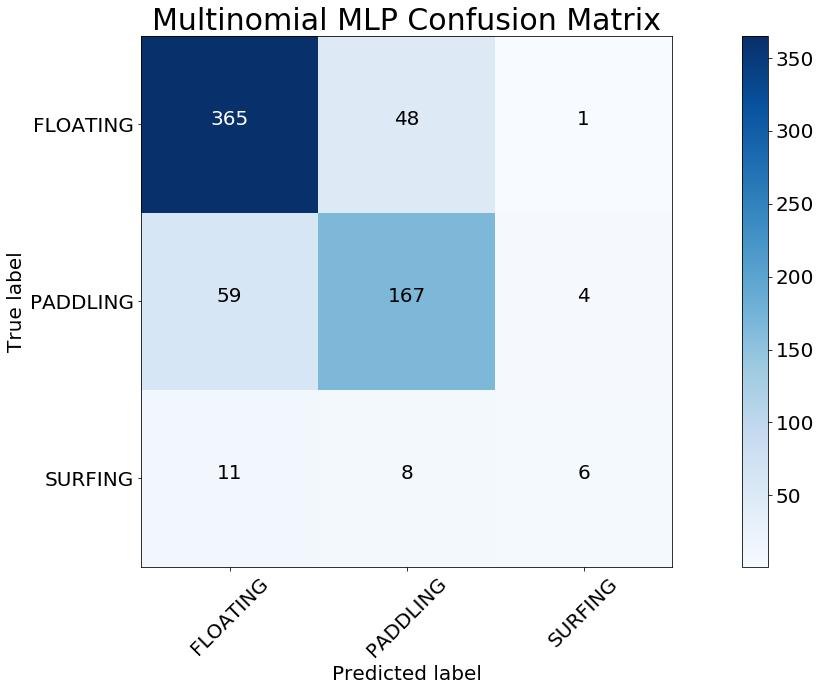

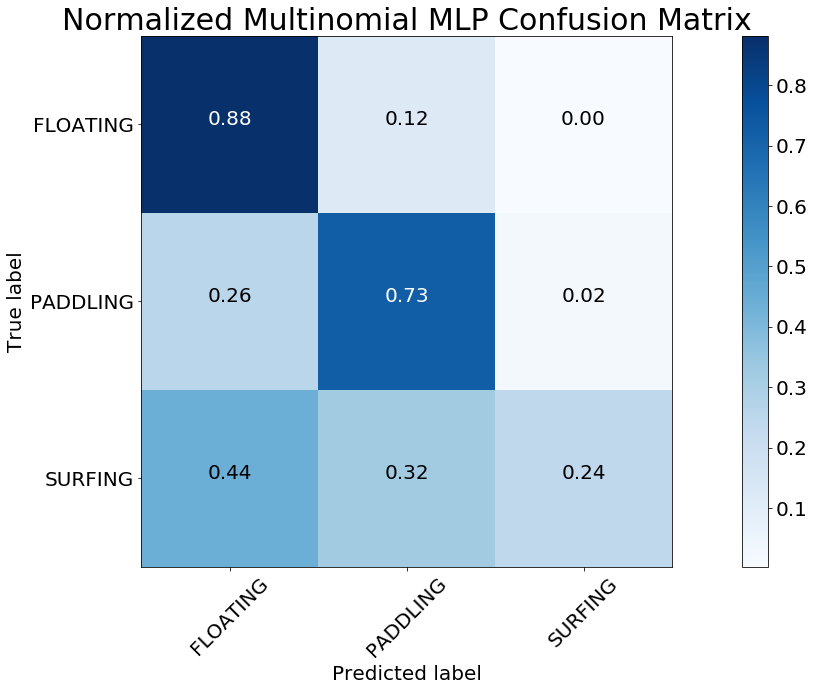

In [74]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING", "MISC"])
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

plt.figure()
plt.grid('off')
plot_confusion_matrix(cm, classes=class_names,
                      title='Multinomial MLP Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized Multinomial MLP Confusion Matrix')

plt.grid('off')

plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print(score)

[0.81260365 0.83084577 0.80762852 0.80762852 0.79767828 0.81229236
 0.81530782 0.81863561 0.79833333 0.82833333]


In [40]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 414, 'PADDLING': 230, 'SURFING': 25}

In [41]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 3898, 'PADDLING': 1966, 'SURFING': 155}

In [42]:
print("Average score from cross validation:")
print(sum(score)/len(score))

Average score from cross validation:
0.8129287196043192


In [43]:
from sklearn import metrics
print("Multiclass MLP Train Accuracy :: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Multiclass MLP Test Accuracy :: ", metrics.accuracy_score(y_test, clf.predict(X_test)))

Multiclass MLP Train Accuracy ::  0.38843661737830204
Multiclass MLP Test Accuracy ::  0.804185351270553


# Results From Testing on Balanced Training Data

In [64]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING", "MISC"])
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

print("When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.")
print(cm)

When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.
[[335  65  14]
 [ 47 174   9]
 [  4   3  18]]


In [65]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print(score)

[0.83846154 0.84957265 0.85213675 0.87179487 0.84188034 0.85213675
 0.85042735 0.84957265 0.85604113 0.87317909]


In [49]:
print("Average score from cross validation:")
print(sum(score)/len(score))

Average score from cross validation:
0.8628380902159822


In [66]:
unique, counts = np.unique(y_train_res, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 3898, 'PADDLING': 3898, 'SURFING': 3898}

Plotting CM ...
Multinomial LR confusion matrix, without normalization
[[335  65  14]
 [ 47 174   9]
 [  4   3  18]]
Multinomial LR normalized confusion matrix
[[0.80917874 0.15700483 0.03381643]
 [0.20434783 0.75652174 0.03913043]
 [0.16       0.12       0.72      ]]


/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


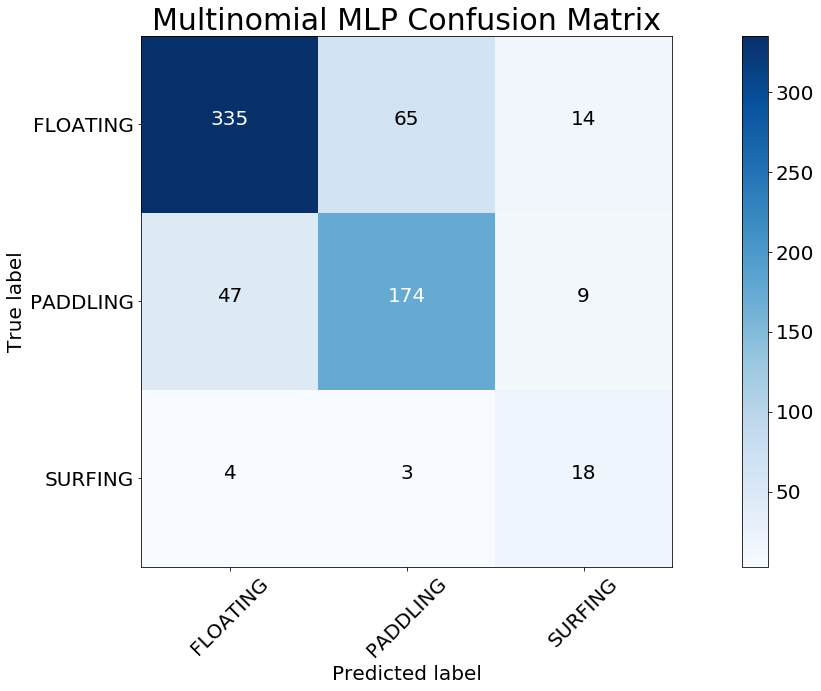

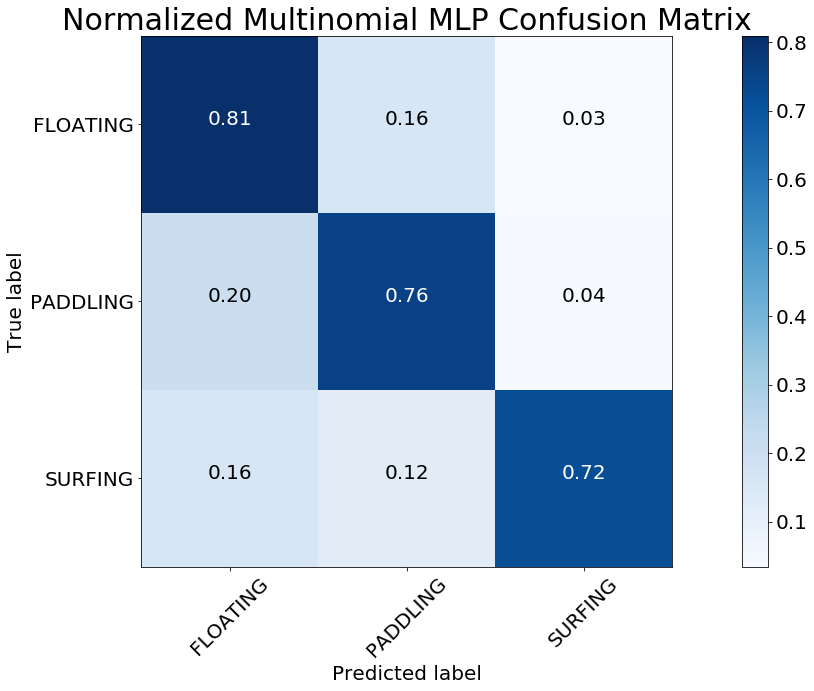

In [67]:
%matplotlib inline

# import packages
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


#axes.titlesize : 24
#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16

class_names = ["FLOATING", "PADDLING", "SURFING"]

print("Plotting CM ...")

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Multinomial LR normalized confusion matrix")
    else:
        print('Multinomial LR confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.grid('off')
plot_confusion_matrix(cm, classes=class_names,
                      title='Multinomial MLP Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized Multinomial MLP Confusion Matrix')

plt.grid('off')

plt.show()

# SVM Test, Trained on Unbalanced Data

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Multinomial LR confusion matrix, without normalization
[[379  35   0]
 [111 119   0]
 [ 19   6   0]]
Multinomial LR normalized confusion matrix
[[0.91545894 0.08454106 0.        ]
 [0.4826087  0.5173913  0.        ]
 [0.76       0.24       0.        ]]


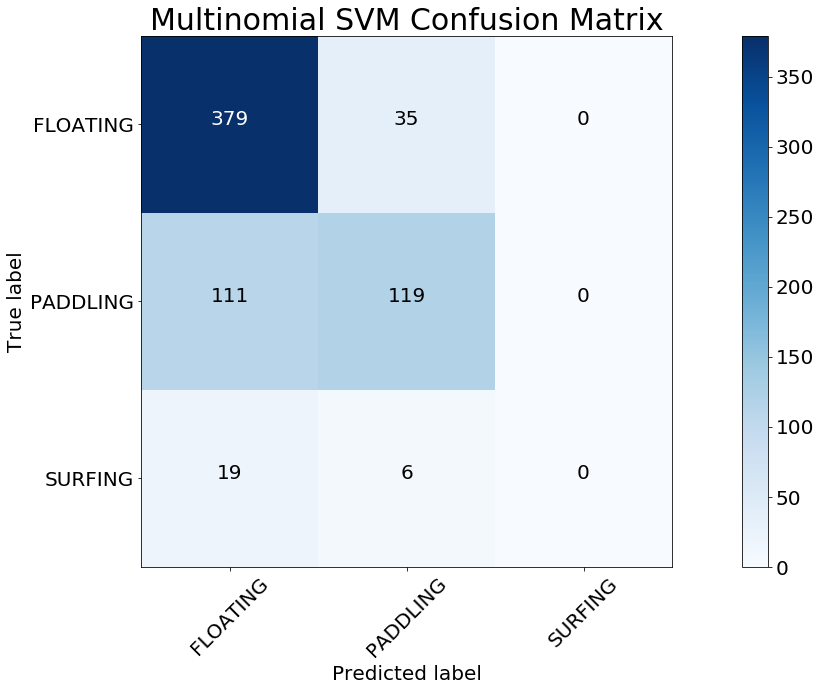

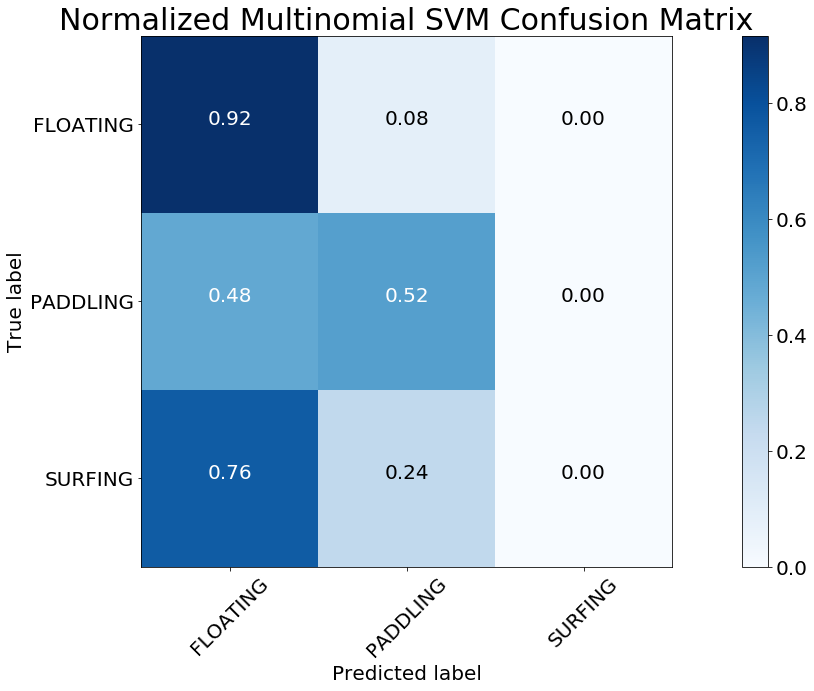

In [72]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_res, y_train_res) 

#Making predictions: use the predict method of the SVC class
y_pred = svclassifier.predict(X_test) 
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

plt.figure()
plt.grid('off')
plot_confusion_matrix(cm, classes=class_names,
                      title='Multinomial SVM Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized Multinomial SVM Confusion Matrix')

plt.grid('off')

plt.show()

# SVM Test, Trained on Balanced Data

In [68]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_res, y_train_res) 

#Making predictions: use the predict method of the SVC class
y_pred = svclassifier.predict(X_test)  

In [69]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Multinomial LR confusion matrix, without normalization
[[236  63 115]
 [ 34 142  54]
 [  5   1  19]]
Multinomial LR normalized confusion matrix
[[0.57004831 0.15217391 0.27777778]
 [0.14782609 0.6173913  0.23478261]
 [0.2        0.04       0.76      ]]


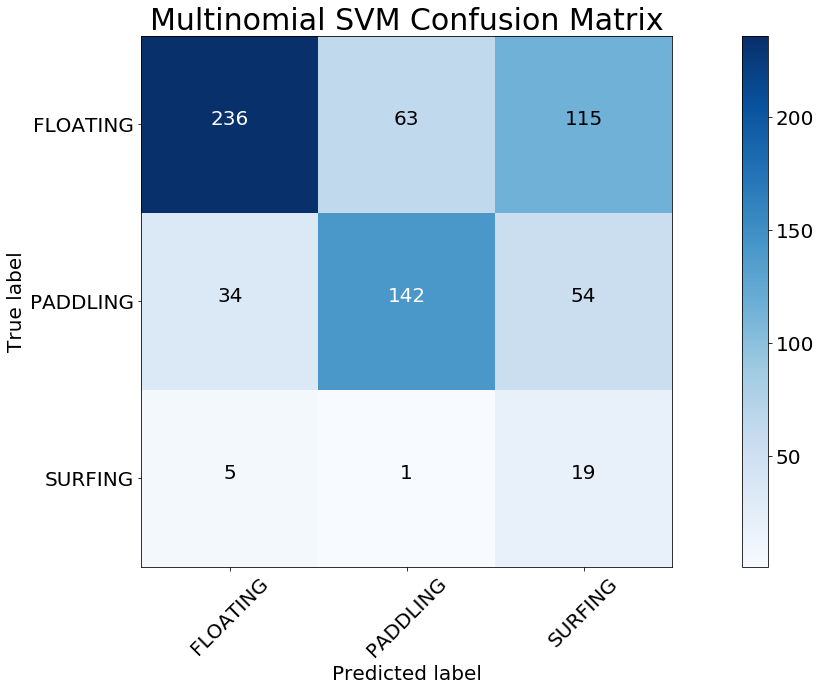

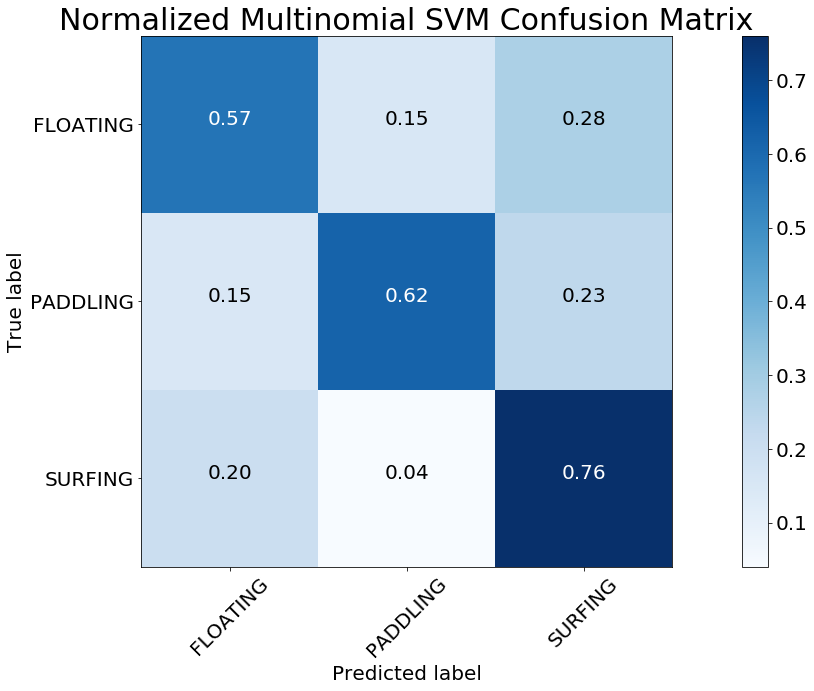

In [54]:
plt.figure()
plt.grid('off')
plot_confusion_matrix(cm, classes=class_names,
                      title='Multinomial SVM Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized Multinomial SVM Confusion Matrix')

plt.grid('off')

plt.show()